<img align="left" width="550" height="800"  src="../Images/ds1.png"  >
<img align="right" width="450"  src="../Images/dl.png"  >


# Perceptron

Perceptron is one of the simplest Artificial Neural Network architectures, introduced by Frank Rosenblatt in the 1950s. It is a basic form of a feedforward neural network with a single layer of input nodes fully connected to a layer of output nodes. Perceptrons are capable of learning linearly separable patterns and use threshold logic units (TLU) as artificial neurons, first introduced by McCulloch and Walter Pitts in the 1940s.
<img src="../Images/simple_perceptron.png"  width='600' alt="Simple Perceptron">
## Types of Perceptron

1. **Single-Layer Perceptron:** Limited to learning linearly separable patterns, effective for tasks where data can be divided into distinct categories through a straight line.
   
2. **Multilayer Perceptron:** Consists of two or more layers, providing enhanced processing capabilities to handle more complex patterns and relationships within the data.



<img align="left" width="500" height="250" src="../Images/singleperceptron.png" alt="Single Perceptron"><img align="right" width="500" height="300" src="../Images/mult_perc.png" alt="Multiple Perceptrons">


## Basic Components of Perceptron

A perceptron, the basic unit of a neural network, comprises essential components:

- **Input Features:** Represent characteristics or attributes of the input data.
- **Weights:** Associated with each input feature, determining their significance. Adjusted during training to learn optimal values.
- **Summation Function:** Calculates the weighted sum of inputs, combining them with their respective weights.
- **Activation Function:** Passes the weighted sum through an activation function, often using Heaviside step functions in the case of perceptrons.
- **Output:** Final output determined by the activation function's result, representing predicted classes (e.g., 0 or 1).
- **Bias:** Additional parameter learned during training, allowing the model to make adjustments independent of input.
- **Learning Algorithm (Weight Update Rule):** Adjusts weights and bias during training based on a learning algorithm, such as the perceptron learning algorithm.

These components work together to enable a perceptron to learn and make predictions. For more complex tasks, multiple perceptrons organized into layers form a neural network.


</body>
</html>



<img align="center" width="800" height="500" src="../Images/perceptrone.png" alt="Multiple Perceptrons">


## How Does Perceptron Work?


<img align="center" width="800" height="500" src="../Images/working_per.png" alt="Multiple Perceptrons">



<img align="center" width="800" height="500" src="../Images/geometric_intution.png" alt="Multiple Perceptrons">


## Perceptron for AND Gate:

<img  width="800" height="500" src="../Images/andgate.png">

Initial w1:  -0.5371657537358145
Initial w2:  0.9067071564068807
Initial bias:  -0.056973983300083075
Calculated w1:  0.16283424626418544
Calculated w2:  0.4067071564068808
Calculated bias:  -0.5569739833000831


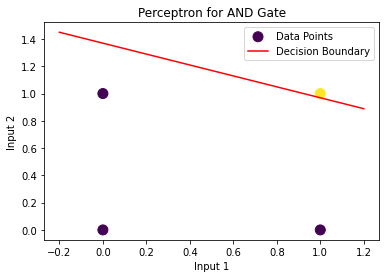

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Perceptron:
    def __init__(self):
        self.w1 = random.uniform(-1, 1)
        self.w2 = random.uniform(-1, 1)
        self.bias = random.uniform(-1, 1)
        print('Initial w1: ',self.w1)
        print('Initial w2: ',self.w2)
        print('Initial bias: ',self.bias)
        self.learning_rate = 0.1

    def predict(self, x1, x2):
        summation = self.w1 * x1 + self.w2 * x2 + self.bias
        return 1 if summation >= 0 else 0

    def train(self, x_train, labels, epochs):
        for epoch in range(epochs):
            for (x1, x2), label in zip(x_train, labels):
                prediction = self.predict(x1, x2)
                error = label - prediction
                self.w1 += self.learning_rate * error * x1
                self.w2 += self.learning_rate * error * x2
                self.bias += self.learning_rate * error

        print('Calculated w1: ',self.w1)
        print('Calculated w2: ',self.w2)
        print('Calculated bias: ',self.bias)

    
    def decision_boundary(self, x):
        return -(self.w1 * x + self.bias) / self.w2

# AND gate truth table
x_train = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

labels = [0, 0, 0, 1]

perceptron = Perceptron()

# Train the perceptron for 100 epochs
perceptron.train(x_train, labels, epochs=100)

# Visualize the decision boundary and data points
plt.scatter([0, 0, 1, 1], [0, 1, 0, 1], c=labels, cmap='viridis', marker='o', s=100, label='Data Points')
x_line = np.linspace(-0.2, 1.2, 100)
y_line = perceptron.decision_boundary(x_line)
plt.plot(x_line, y_line, color='r', label='Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Perceptron for AND Gate')
plt.legend()
plt.show()


## Perceptron for OR Gate

Initial w1:  -0.423511
Initial w2:  0.0874
Initial bias:  -0.162756
-----------------------------------
Calculated w1:  0.07648900000000003
Calculated w2:  0.2874
Calculated bias:  -0.062756
-----------------------------------
Testing perceptron for OR:
Inputs: (0, 0), Prediction: 0
Inputs: (0, 1), Prediction: 1
Inputs: (1, 0), Prediction: 1
Inputs: (1, 1), Prediction: 1


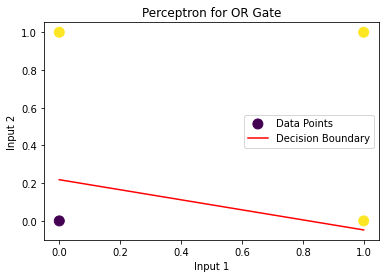

In [10]:
class PerceptronOR:
    def __init__(self):
        self.w1 = -0.423511
        self.w2 = 0.0874
        self.bias = -0.162756
        
        print('Initial w1: ',self.w1)
        print('Initial w2: ',self.w2)
        print('Initial bias: ',self.bias)
        
        self.learning_rate = 0.1
    def predict(self, x1, x2):
        summation = self.w1 * x1 + self.w2 * x2 + self.bias
        return 1 if summation >= 0 else 0

    def train(self, x_train, labels, epochs):
        for epoch in range(epochs):
            for (x1, x2), label in zip(x_train, labels):
                prediction = self.predict(x1, x2)
                error = label - prediction
                self.w1 += self.learning_rate * error * x1
                self.w2 += self.learning_rate * error * x2
                self.bias += self.learning_rate * error
        print('-----------------------------------')
        print('Calculated w1: ',self.w1)
        print('Calculated w2: ',self.w2)
        print('Calculated bias: ',self.bias)
        

    def decision_boundary(self, x):
        return -(self.w1 * x + self.bias) / self.w2

# OR gate truth table
x_train_or = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

labels_or = [0, 1, 1, 1]

perceptron_or = PerceptronOR()

# Train the perceptron for 100 epochs
perceptron_or.train(x_train_or, labels_or, epochs=10)
print('-----------------------------------')

# Test and visualize the trained perceptron for OR
print("Testing perceptron for OR:")
for inputs in x_train_or:
    prediction = perceptron_or.predict(*inputs)
    print(f"Inputs: {inputs}, Prediction: {prediction}")

# Visualize the decision boundary and data points for OR
plt.scatter([0, 0, 1, 1], [0, 1, 0, 1], c=labels_or, cmap='viridis', marker='o', s=100, label='Data Points')
x_line_or = np.linspace(0, 1, 100)
y_line_or = perceptron_or.decision_boundary(x_line_or)
plt.plot(x_line_or, y_line_or, color='r', label='Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Perceptron for OR Gate')
plt.legend()
plt.show()


## Perceptron for XOR Gate

Initial w1:  -0.13169072445392804
Initial w2:  -0.08371244136730738
Initial bias:  -0.36954175762733144
Calculated w1:  -0.03169072445392804
Calculated w2:  0.016287558632692628
Calculated bias:  0.03045824237266856
Testing perceptron for XOR:
Inputs: (0, 0), Prediction: 1
Inputs: (0, 1), Prediction: 1
Inputs: (1, 0), Prediction: 0
Inputs: (1, 1), Prediction: 1


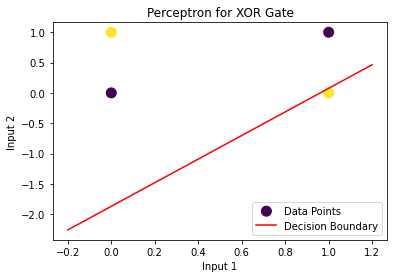

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np

class PerceptronXOR:
    def __init__(self):
        self.w1 = random.uniform(-1, 1)
        self.w2 = random.uniform(-1, 1)
        self.bias = random.uniform(-1, 1)
        self.learning_rate = 0.1
        print('Initial w1: ',self.w1)
        print('Initial w2: ',self.w2)
        print('Initial bias: ',self.bias)

    def predict(self, x1, x2):
        summation = self.w1 * x1 + self.w2 * x2 + self.bias
        return 1 if summation >= 0 else 0

    def train(self, x_train, labels, epochs):
        for epoch in range(epochs):
            for (x1, x2), label in zip(x_train, labels):
                prediction = self.predict(x1, x2)
                error = label - prediction
                self.w1 += self.learning_rate * error * x1
                self.w2 += self.learning_rate * error * x2
                self.bias += self.learning_rate * error
        print('Calculated w1: ',self.w1)
        print('Calculated w2: ',self.w2)
        print('Calculated bias: ',self.bias)
    
    def decision_boundary(self, x):
        return -(self.w1 * x + self.bias) / self.w2

# XOR gate truth table
x_train = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

labels = [0, 1, 1, 0]

perceptron = PerceptronXOR()

# Train the perceptron for 100 epochs
perceptron.train(x_train, labels, epochs=100)

# Test and visualize the trained perceptron for XOR
print("Testing perceptron for XOR:")
for inputs in x_train:
    prediction = perceptron.predict(*inputs)
    print(f"Inputs: {inputs}, Prediction: {prediction}")

# Visualize the decision boundary and data points for XOR
plt.scatter([0, 0, 1, 1], [0, 1, 0, 1], c=labels, cmap='viridis', marker='o', s=100, label='Data Points')
x_line_ = np.linspace(-0.2, 1.2, 100)
y_line = perceptron.decision_boundary(x_line)
plt.plot(x_line, y_line, color='r',label='Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Perceptron for XOR Gate')
plt.legend()
plt.show()


>  The XOR gate is not linearly separable, and a single-layer perceptron (which has a linear decision boundary) cannot accurately represent XOR. We need a more complex model, such as a multi-layer perceptron (MLP) with at least one hidden layer

# Summary


<img align="center" width="800" height="500" src="../Images/gates.png" alt="Multiple Perceptrons">


# Frequently Asked Questions(FAQs)

## 1. What is the Perceptron model in Machine Learning?

> The perceptron is a linear algorithm in machine learning employed for supervised learning tasks involving binary classification. It serves as a foundational element for understanding both machine learning and deep learning, comprising weights, input values or scores, and a threshold.

# 2. What are the basic components of Perceptron?.

>The basic components of a perceptron include input values or features, weights associated with each input, a summation function, an activation function, a bias term, and an output. These elements collectively enable the perceptron to learn and make binary classifications in machine learning tasks.

# 3. What is Binary classifier in Machine Learning?

> A binary classifier in machine learning is a type of algorithm designed to categorize input data into two distinct classes or categories. The goal is to assign each input instance to one of the two classes based on its features or characteristics.

# 4. What is the Perceptron Learning Algorithm?

> The Perceptron Learning Algorithm is a binary classification algorithm used in supervised learning. It adjusts weights associated with input features iteratively based on misclassifications, aiming to find a decision boundary that separates classes. It continues until all training examples are correctly classified or a predefined number of iterations is reached.

# 5. What is the difference between Perceptron and Multi-layer Perceptron?


> The Perceptron is a single-layer neural network used for binary classification, learning linearly separable patterns. In contrast, a Multi-layer Perceptron (MLP) has multiple layers, enabling it to learn complex, non-linear relationships. MLPs have input, hidden, and output layers, allowing them to handle more intricate tasks compared to the simpler Perceptron.